Exercises from https://ds.codeup.com/stats/simulation/

In [148]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

1. How likely is it that you roll doubles when rolling two dice?

In [38]:
n_simulations = 10_000
n_trials = 2

dice_rolls = np.random.randint(1,7,size=(n_simulations, n_trials))

In [39]:
dice_rolls = pd.DataFrame(dice_rolls, columns = ["first","second"])

In [40]:
dice_rolls

,first,second
0,6,1
1,6,6
2,1,5
3,1,1
4,5,1
...,...,...
9995,5,5
9996,2,2
9997,6,5
9998,4,3


In [42]:
dice_rolls.apply(lambda row:row.array[0]==row.array[1], axis =1).mean()

0.1706

2. If you flip 8 coins, what is the probability of getting exactly 3 heads?

In [43]:
n_trials = 8

coin_flips = np.random.choice([1,0],size=(n_simulations,n_trials))

In [44]:
print(f"The probability of getting exactly 3 heads from flipping 8 coins is {(coin_flips.sum(axis=1)==3).mean()}")

The probability of getting exactly 3 heads from flipping 8 coins is 0.2225


2. What is the probability of getting more than 3 heads?

In [24]:
print(f"The probability of getting more than 3 heads from flipping 8 coins is {(coin_flips.sum(axis=1)>3).mean()}")

The probability of getting more than 3 heads from flipping 8 coins is 0.6355


3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [209]:
n_trials = 2

billboard_choices = np.random.choice([1,0,0,0], size = (n_simulations, n_trials))

In [210]:
print(f"The probability of seeing two billboards with data science students on them is {(billboard_choices.sum(axis=1)==2).mean()}")

The probability of seeing two billboards with data science students on them is 0.0648


4. Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal)

In [35]:
n_trials = 4

poptart = np.random.normal(3, 1.5, n_simulations*n_trials).reshape(n_simulations,n_trials)

In [41]:
print(f"The chance of there being at least 1 poptart remaining on Friday is {(poptart.sum(axis=1)<=16).mean()}")

The chance of there being at least 1 poptart remaining on Friday is 0.9076


5. Compare Heights:
Men have an average height of 178 cm and standard deviation of 8cm.
Women have a mean of 170, sd = 6cm.
Since you have means and standard deviations, you can use np.random.normal to generate observations.
If a man and woman are chosen at random, P(woman taller than man)?

In [45]:
n_trials = 2
man = {'man':np.random.normal(178,8, size=(n_simulations))}
woman = {'woman': np.random.normal(170,6, size=(n_simulations))}


In [46]:
both = pd.DataFrame.from_dict({**man,**woman})

In [47]:
both['woman_taller'] = both.apply(lambda row: row.woman>row.man, axis =1)

In [48]:
print(f"Probability woman taller than man: {both.woman_taller.mean()}")

Probability woman taller than man: 0.2079


6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue? 

In [49]:
prob_failure = 1/250
n_trials = 50

downloads = np.random.random((n_simulations, n_trials))

In [50]:
print(f"Chance of not one of the {n_trials} students having an installation issue: {((downloads>prob_failure).sum(axis=1)==n_trials).mean()}")

Chance of not one of the 50 students having an installation issue: 0.8165


6. 100 students?

In [51]:
n_trials = 100

downloads = np.random.random((n_simulations, n_trials))
print(f"Chance of not one of the {n_trials} students having an installation issue: {((downloads>prob_failure).sum(axis=1)==n_trials).mean()}")

Chance of not one of the 100 students having an installation issue: 0.6664


6. What is the probability that we observe an installation issue within the first 150 students that download anaconda?

In [52]:
n_trials = 150

downloads = np.random.random((n_simulations, n_trials))
# print(f"Chance of having an installation issue within the first {n_trials} students: {((downloads<=prob_failure).sum(axis=1)>0).mean()}")
print(f"Chance of having an installation issue within the first {n_trials} students: {((downloads>prob_failure).sum(axis=1)<n_trials).mean()}")

Chance of having an installation issue within the first 150 students: 0.4588


How likely is it that 450 students all download anaconda without an issue?

In [53]:
n_trials = 450

downloads = np.random.random((n_simulations, n_trials))
print(f"Chance of no issues with downloading for {n_trials} students: {((downloads>prob_failure).sum(axis=1)==n_trials).mean()}")

Chance of no issues with downloading for 450 students: 0.1687


7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

In [56]:
n_trials = 3
chance = 0.7

food_truck = np.random.random((n_simulations, n_trials))

In [57]:
food_truck

array([[0.87097363, 0.22733118, 0.48652809],
       [0.77503044, 0.97741841, 0.12343147],
       [0.59171841, 0.37594278, 0.38255149],
       ...,
       [0.91802628, 0.98853274, 0.1587792 ],
       [0.97776276, 0.26190577, 0.99877288],
       [0.99886654, 0.52623866, 0.02638521]])

In [58]:
food_truck>chance

array([[ True, False, False],
       [ True,  True, False],
       [False, False, False],
       ...,
       [ True,  True, False],
       [ True, False,  True],
       [ True, False, False]])

In [60]:
# Chance of a number being greater than 70% is the chance of not seeing a food truck 
((food_truck>chance).sum(axis=1)==3).mean()

0.0265

7. How likely is it that a food truck will show up sometime this week?


In [24]:
n_trials = 7

food_truck = np.random.random((n_simulations, n_trials))

In [25]:
((food_truck<=chance).sum(axis=1)>0).mean()

0.9998

8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

The chance of 2 of 20 people sharing a birthday are 0.4129
The chance of 2 of 23 people sharing a birthday are 0.507
The chance of 2 of 40 people sharing a birthday are 0.8936


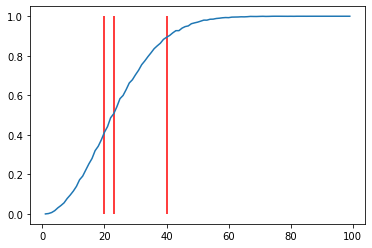

In [226]:
of_interest = [23,20,40]
num_peoples = range(1,100)
results = []
for n_people in num_peoples:
    
    birthday = np.random.randint(1,366,size = (n_simulations,n_people))
    birthday = pd.DataFrame(birthday)
    birthday["unique_values"] = birthday.apply(lambda row: len(set(row)), axis =1)
    birthday["num_values"] = n_people
    # This differerence should be 1 if two people share
    birthday["birthday_match"] = (birthday.num_values - birthday.unique_values) >= 1
    #print(f"The chance of {n_people} people sharing a birthday are {birthday.birthday_match.mean()}")
    results.append(birthday.birthday_match.mean())
    if n_people in of_interest:
        print(f"The chance of 2 of {n_people} people sharing a birthday are {birthday.birthday_match.mean()}")

plt.plot(num_peoples, results)
for n in of_interest:
    plt.vlines(n,0,1, color = 'r')